In [1]:
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
MOVIE_PATH = DATA_PATH + 'Control 050721/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.filters import gaussian
from tqdm.notebook import trange, tqdm
import pandas as pd
import movie_structure
from concurrent.futures import ThreadPoolExecutor
import preprocessing
import autocorrelation_and_structure_factor_IK_20220103 as iac
import importlib
import seaborn as sns
from skimage import filters
#from p_tqdm import p_map
from scipy.ndimage import median_filter


In [2]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r+')
open_mask = np.load(MOVIE_PATH + 'np/open_mask.npy', mmap_mode='r+')

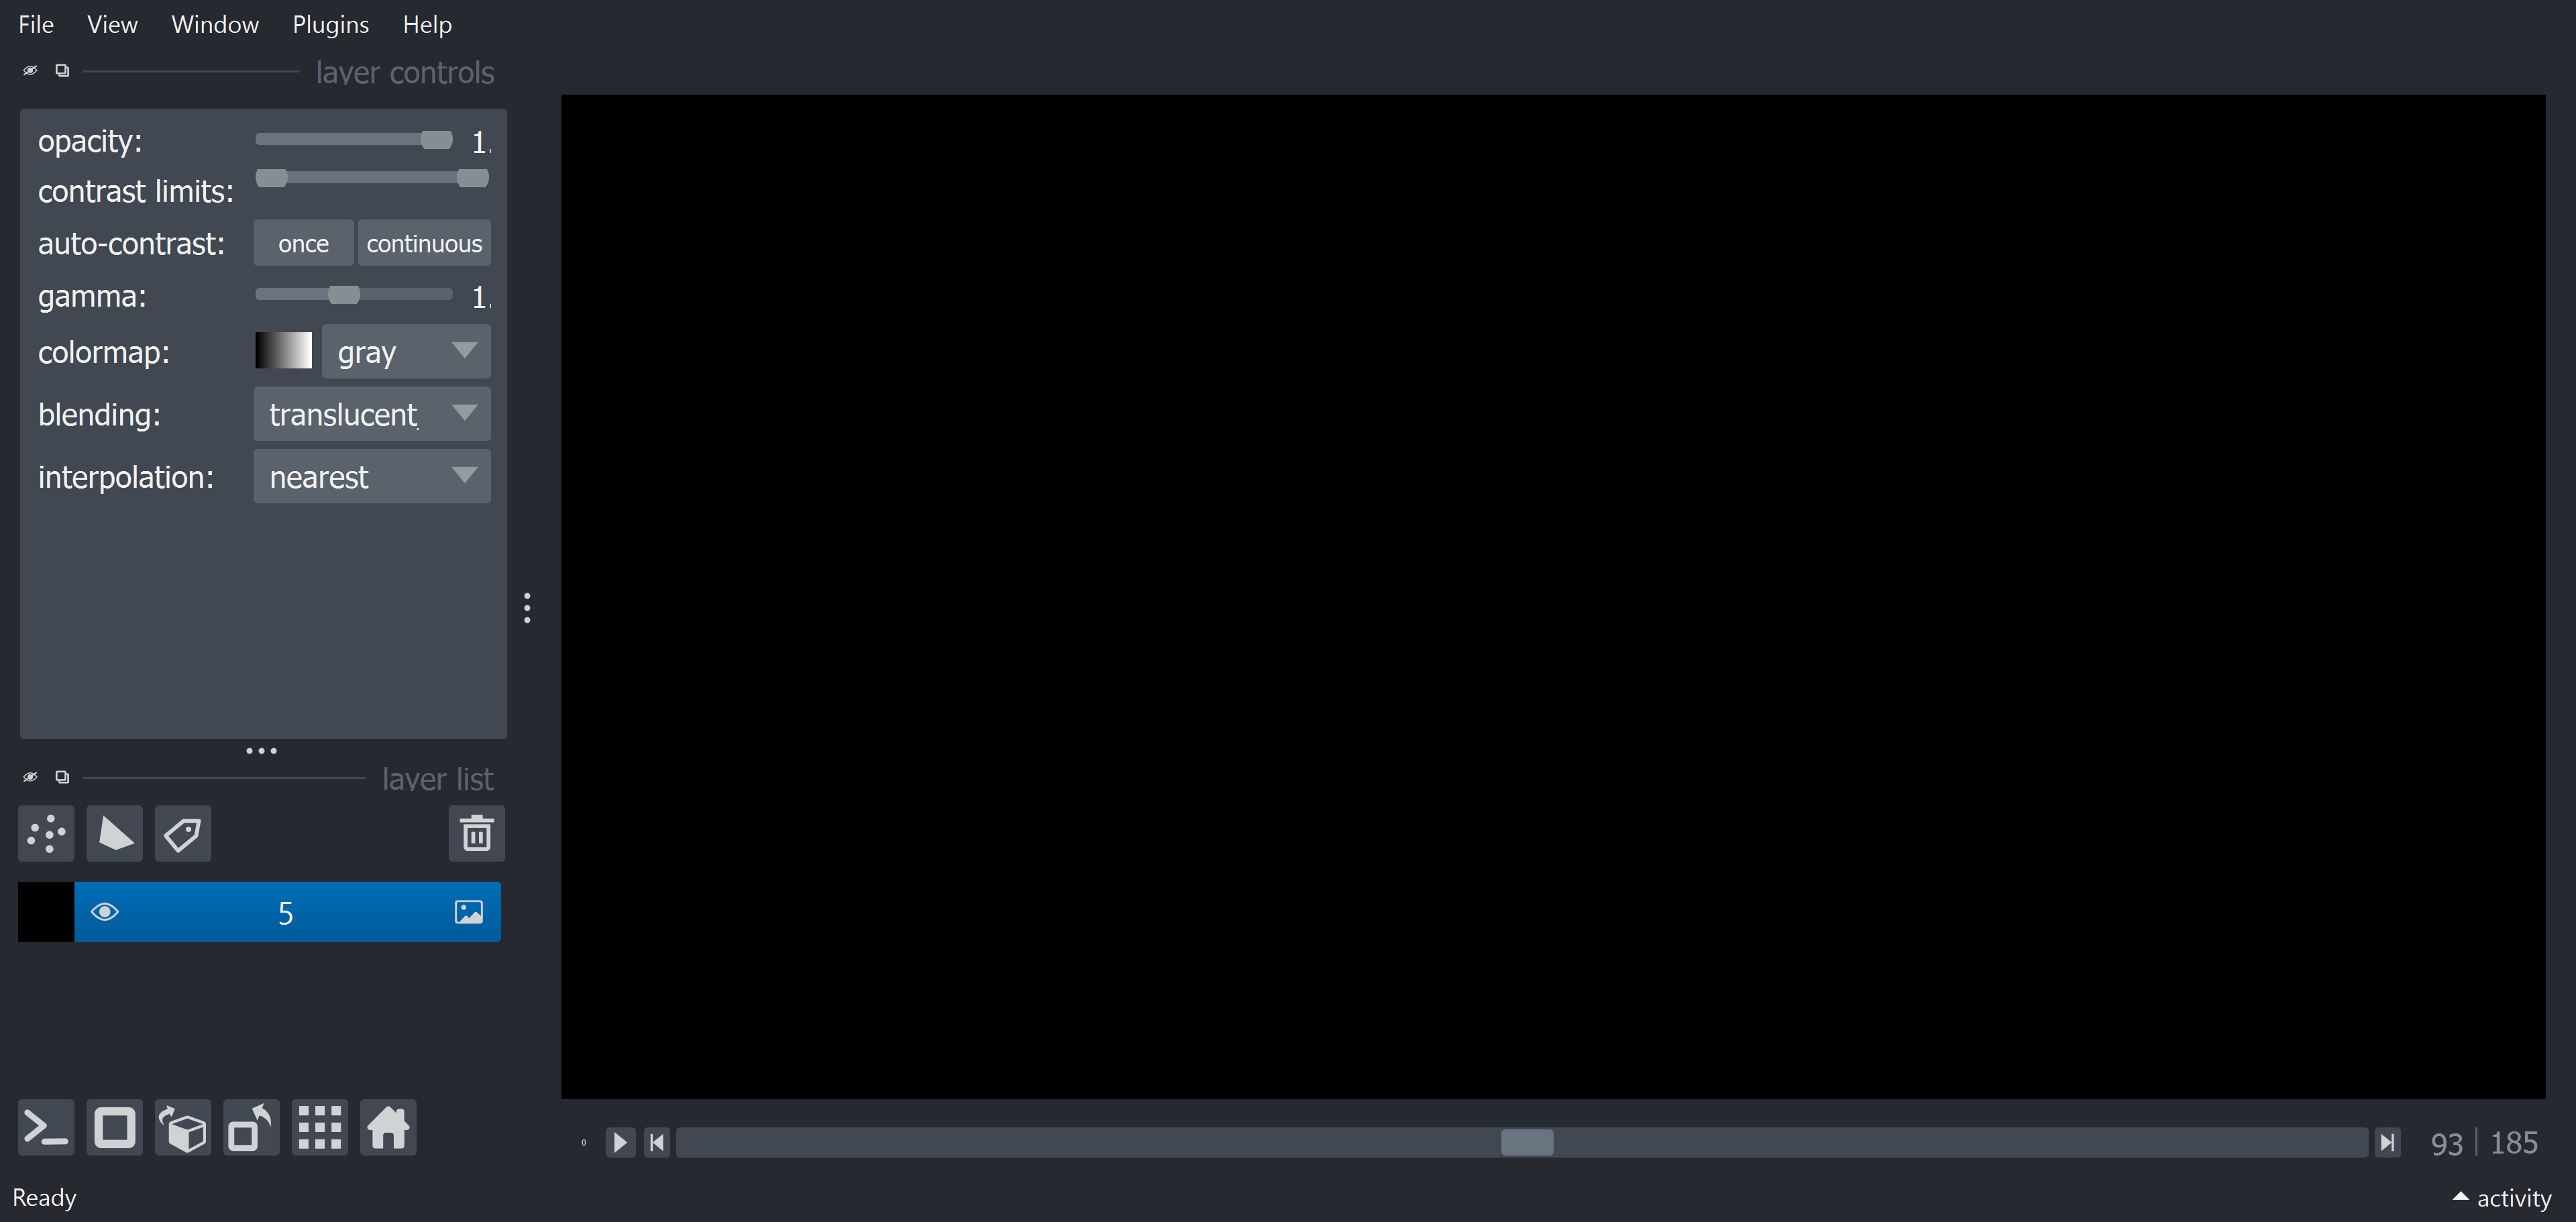

In [24]:
import napari

viewer = napari.Viewer()
image = open_mask[6, :, :, :]
viewer.add_image(image, name='6')
napari.utils.nbscreenshot(viewer)

In [ ]:
from skimage import morphology
image = open_mask[47, :, :, 256]
open = morphology.binary_opening(image, morphology.disk(3))
viewer.add_image(open, name='open')


In [ ]:
open_list = []
open_mask = np.zeros(mask.shape)
for t in trange(len(mask)):
    for x in range(mask.shape[3]):
        open_mask[t,:,:,x] = morphology.binary_opening(mask[t,:,:,x], morphology.disk(3))

viewer.add_image(open_mask[:,:,:,30], name='open_30')


In [27]:
for t in [5,25,45,65,85]:
    viewer.add_image(gel [t,:,:,:], name='gel %d'%t)


In [23]:
x = 30
for t in range(20,30,2):
    image =gel[t,:,:,x].copy()
    thresh = filters.threshold_li(image)
    binary = image > thresh
    image[~binary] = 0
    viewer.add_image(image, name='li %d x=%d'%(t,x))

# add sobel filter to each image


In [21]:
 viewer.add_image(open_mask[t,:,:,x], name='open %d'%t)

<Image layer 'open 93' at 0x2336c344610>

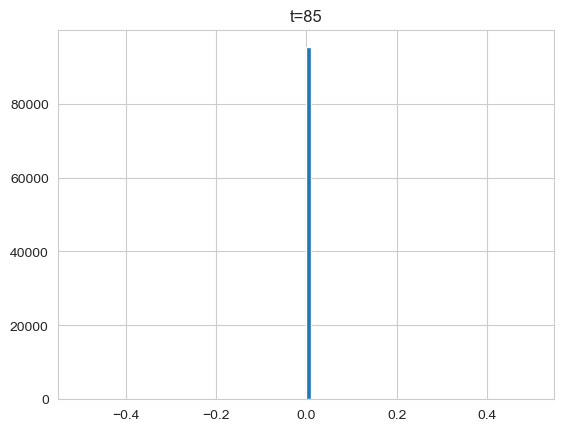

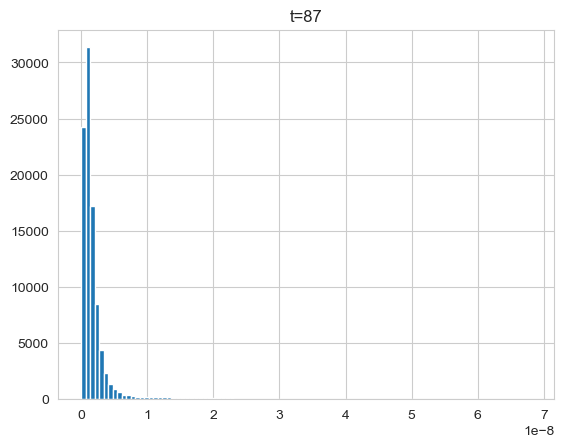

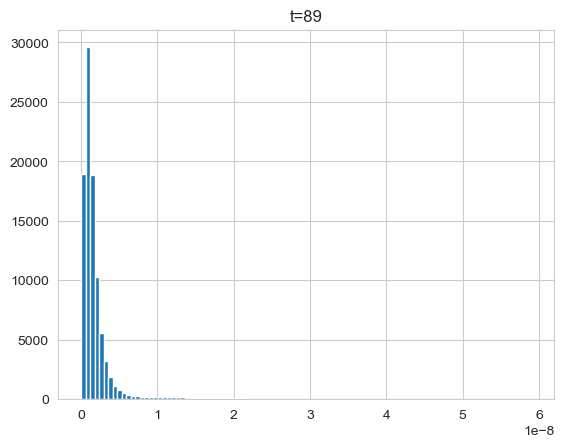

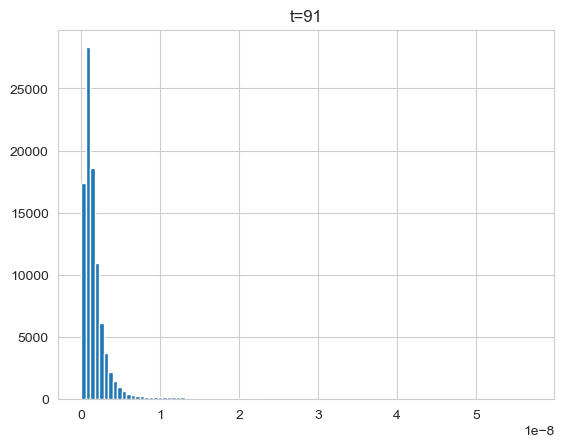

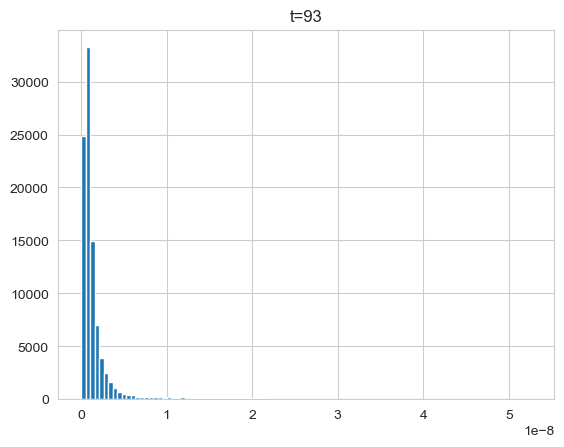

In [8]:
for t in range(85,95,2):
    plt.hist(filters.sobel(gel[t,:,:,256]).flatten(), bins=100)
    plt.title('t=%d'%t)
    plt.show()



In [ ]:
#threshold with otsu
for t in range(85,95,2):
    plt.hist(filters.threshold_otsu(gel[t,:,:,256]), bins=100)
    plt.title('t=%d'%t)
    plt.show()
for t in range(85,95,2):
    plt.hist(gel[t,:,:,256].flatten(), bins=100)
    plt.title('t=%d'%t)
    plt.show()

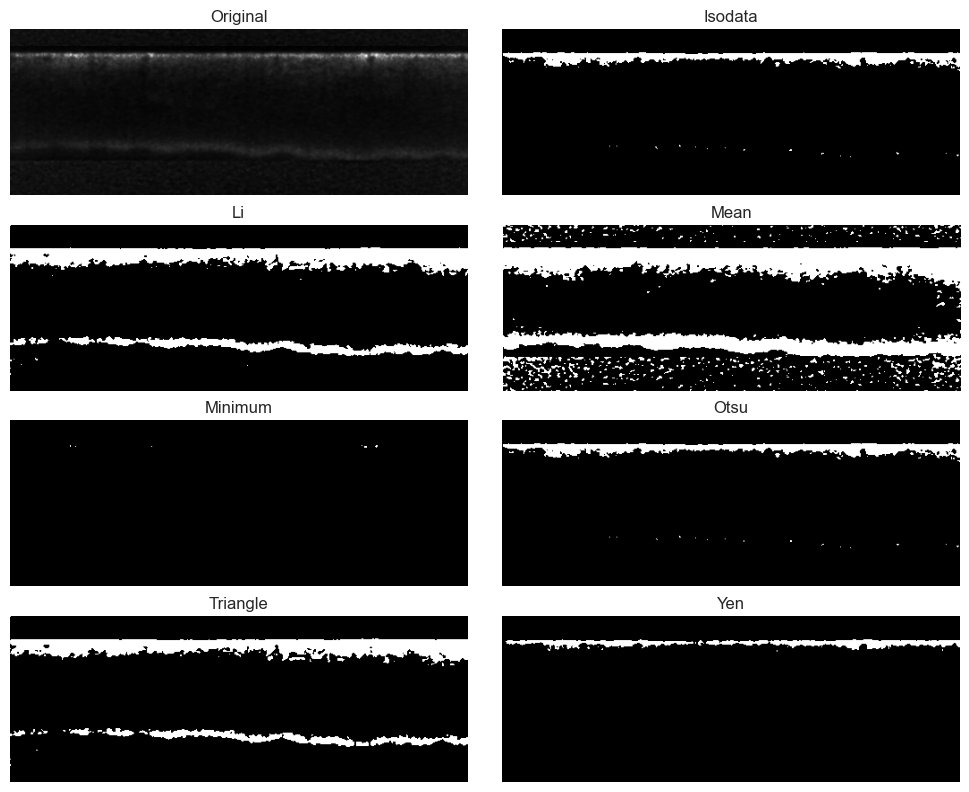

In [10]:
#view all thresholds in skimage.filters.thresholding
# Apply all the thresholding methods and display the results
image = gel[91,:,:,256]
fig, ax = filters.try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()